# Data Analysis

In [34]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read data file
full_df = pd.read_csv("../Data-Collisions.csv", low_memory=False)
full_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
full_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
df = full_df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df = df[df['WEATHER'] != 'Unknown']
df = df[df['ROADCOND'] != 'Unknown']
df = df[df['LIGHTCOND'] != 'Unknown']
df['SEVERITYCODE'].value_counts()
full_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [5]:

df_1 = df[df['SEVERITYCODE']==1]
df_2 = df[df['SEVERITYCODE']==2]

df_1_downsampled = df_1.sample(n=56983)

df = pd.concat([df_1_downsampled,df_2]).reset_index()
df['SEVERITYCODE'].value_counts()





2    56983
1    56983
Name: SEVERITYCODE, dtype: int64

In [6]:
df.head()

,index,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,34225,1,Overcast,Dry,Daylight
1,151819,1,Raining,Wet,Daylight
2,118830,1,Clear,Dry,Dark - Street Lights On
3,181061,1,NaN,NaN,NaN
4,108798,1,Clear,Dry,Dark - Street Lights On


In [7]:
df.dtypes

index            int64
SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [8]:
df['ROADCOND'].value_counts()

Dry               79221
Wet               30433
Ice                 661
Snow/Slush          480
Other                76
Standing Water       65
Oil                  43
Sand/Mud/Dirt        36
Name: ROADCOND, dtype: int64

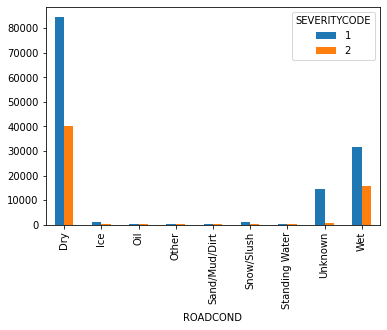

In [9]:
pd.crosstab(full_df['ROADCOND'],full_df['SEVERITYCODE']).plot(kind='bar')

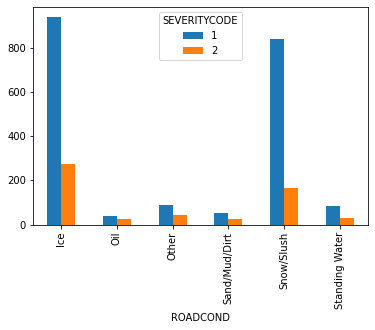

In [10]:
full_df0 = full_df[ (full_df['ROADCOND']!= "Dry") & (full_df['ROADCOND']!= "Wet") & (full_df['ROADCOND']!= "Unknown")]
pd.crosstab(full_df0['ROADCOND'],full_df0['SEVERITYCODE']).plot(kind='bar')

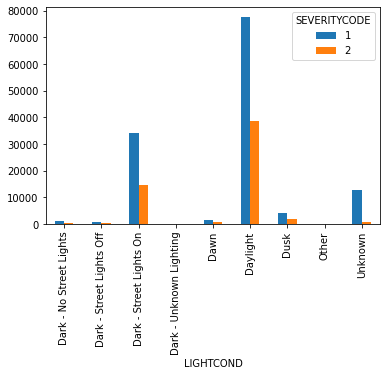

In [11]:
pd.crosstab(full_df['LIGHTCOND'],full_df['SEVERITYCODE']).plot(kind='bar')

In [12]:
full_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

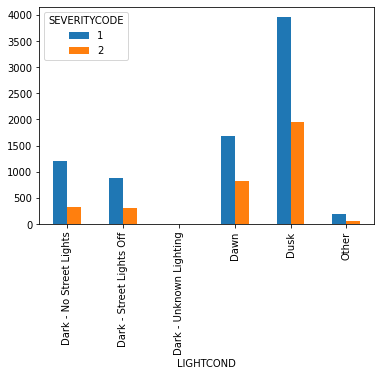

In [13]:
full_df1 = full_df[ (full_df['LIGHTCOND']!= "Dark - Street Lights On") & (full_df['LIGHTCOND']!= "Daylight") & (full_df['LIGHTCOND']!= "Unknown")]
pd.crosstab(full_df1['LIGHTCOND'],full_df1['SEVERITYCODE']).plot(kind='bar')

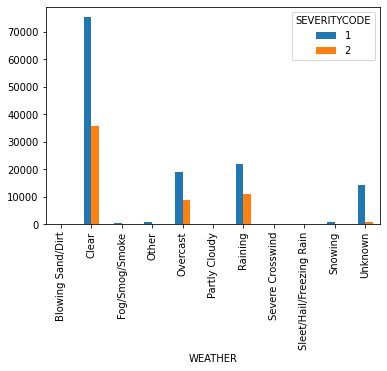

In [14]:
pd.crosstab(full_df['WEATHER'],full_df['SEVERITYCODE']).plot(kind='bar')

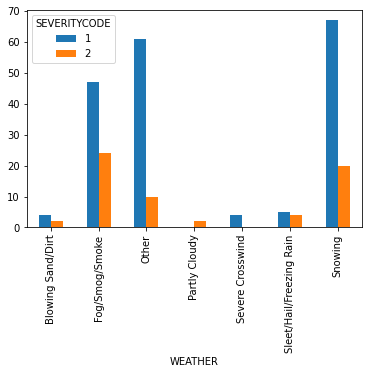

In [15]:
full_df2 = full_df[ (full_df['WEATHER']!= "Clear") & (full_df['WEATHER']!= "Overcast")  & (full_df['WEATHER']!= "Raining") &(full_df['WEATHER']!= "Unknown")]
pd.crosstab(full_df2['WEATHER'],full_df1['SEVERITYCODE']).plot(kind='bar')

In [25]:
ct_weather = pd.crosstab(full_df['WEATHER'],full_df['SEVERITYCODE']).apply(lambda r: r/r.sum(), axis=1)
ct_weather.sort_values(by = [2])

SEVERITYCODE,1,2
WEATHER,,
Unknown,0.945928,0.054072
Other,0.860577,0.139423
Snowing,0.811466,0.188534
Sleet/Hail/Freezing Rain,0.752212,0.247788
Blowing Sand/Dirt,0.732143,0.267857
Severe Crosswind,0.720000,0.280000
Overcast,0.684456,0.315544
Clear,0.677509,0.322491
Fog/Smog/Smoke,0.671353,0.328647


In [ ]:
dic_weather = {'Unknown': 0, 'Other': 0,\
              'Clear': 1,'Overcast':1,'Partly Cloudy':1\
              'Fog/Smog/Smoke': 2}

In [28]:
ct_light = pd.crosstab(full_df['LIGHTCOND'],full_df['SEVERITYCODE']).apply(lambda r: r/r.sum(), axis=1)
ct_light.sort_values(by = [2])

SEVERITYCODE,1,2
LIGHTCOND,,
Unknown,0.955095,0.044905
Dark - No Street Lights,0.782694,0.217306
Other,0.778723,0.221277
Dark - Street Lights Off,0.736447,0.263553
Dark - Street Lights On,0.701589,0.298411
Dawn,0.670663,0.329337
Dusk,0.670620,0.329380
Daylight,0.668116,0.331884
Dark - Unknown Lighting,0.636364,0.363636


In [29]:
ct_road = pd.crosstab(full_df['ROADCOND'],full_df['SEVERITYCODE']).apply(lambda r: r/r.sum(), axis=1)
ct_road.sort_values(by = [2])

SEVERITYCODE,1,2
ROADCOND,,
Unknown,0.950325,0.049675
Snow/Slush,0.833665,0.166335
Ice,0.774194,0.225806
Standing Water,0.739130,0.260870
Sand/Mud/Dirt,0.693333,0.306667
Dry,0.678227,0.321773
Other,0.674242,0.325758
Wet,0.668134,0.331866
Oil,0.625000,0.375000


In [32]:
pd.crosstab(full_df['ADDRTYPE'],full_df['SEVERITYCODE']).apply(lambda r: r/r.sum(), axis=1).sort_values(by = [2])

SEVERITYCODE,1,2
ADDRTYPE,,
Alley,0.890812,0.109188
Block,0.762885,0.237115
Intersection,0.572476,0.427524
